---
title: "Homework 2"
format:
    html:
        embed-resources: true
---

__Due Date:__ 2025-10-15 at 8:30 AM PT
---


__Name:__ \<Benjamin Salvo\>

For this assignment, you will practice downloadings, cleaning, and analyzing data from the [National Risk Index (NRI)](https://hazards.fema.gov/nri/) and the [CDC Social Vulnerability Index (SVI)](https://www.atsdr.cdc.gov/placeandhealth/svi/index.html).

## Preparation

1. Create a 'data' folder in the root directory of your repository.
1. Inside the 'data' folder, create a 'raw' folder.
1. Add and commit a '.gitignore' file to the root directory of this repository that excludes all contents of the 'data' folder.
1. Download the county-level NRI and SVI data for the entire United States. Place the data in the 'data/raw' folder.
    - NRI data: Download the "All Counties - County-level detail (Table)" CSV file from [here](https://hazards.fema.gov/nri/data-resources#csvDownload).
    - SVI data: Download the 2022 county-level dataset (CSV format) from [here](https://www.atsdr.cdc.gov/place-health/php/svi/svi-data-documentation-download.html).
1. In the repository README, provide a brief (1-2 sentence) description of each file in the 'data' folder and a link to the original source of the data.

## Task 1 - NRI Data Cleaning

__1. Import the NRI data. Ensure that the [FIPS code](https://en.wikipedia.org/wiki/Federal_Information_Processing_Standard_state_code) variable ('STCOFIPS') is correctly identified as a string / character variable. Otherwise, the leading zeros will be removed.__

In [3]:
# First we are using the default functions on Python

import csv

file_path1 = '../data/raw/NRI_Table_Counties.csv'    

In [4]:
# Using pandas
import pandas as pd

#Creating nri_data for the original data table

nri_data = pd.read_csv(file_path1)

print(nri_data.head())  

   OID_  NRI_ID    STATE STATEABBRV  STATEFIPS   COUNTY COUNTYTYPE  \
0     1  C01001  Alabama         AL          1  Autauga     County   
1     2  C01003  Alabama         AL          1  Baldwin     County   
2     3  C01005  Alabama         AL          1  Barbour     County   
3     4  C01007  Alabama         AL          1     Bibb     County   
4     5  C01009  Alabama         AL          1   Blount     County   

   COUNTYFIPS  STCOFIPS  POPULATION  ...  WNTW_EALS            WNTW_EALR  \
0           1      1001       58764  ...  15.784587             Very Low   
1           3      1003      231365  ...  56.205509  Relatively Moderate   
2           5      1005       25160  ...  18.632002       Relatively Low   
3           7      1007       22239  ...  13.308573             Very Low   
4           9      1009       58992  ...  23.645930       Relatively Low   

      WNTW_ALRB     WNTW_ALRP     WNTW_ALRA WNTW_ALR_NPCTL    WNTW_RISKV  \
0  2.687716e-07  7.410082e-09  8.725777e-06   

In [5]:
# Checking if STCOFIPS is a string/character variable

print(nri_data["STCOFIPS"].dtype)   

# Converting the variable from a Integer into a String  

nri_data["STCOFIPS"] = nri_data["STCOFIPS"].astype("string") 

# And checking if know is a string  

print(nri_data["STCOFIPS"].dtype) 

int64
string


__2. Subset the NRI data to include only the 5-digit state/county FIPS code and all colums ending with '\_AFREQ' and '\_RISKR'. Each of these columns represents a different hazard type.__

In [6]:
# Selecting columns ending with AFREQ
columns_ending_AFREQ = [col for col in nri_data.columns if col.endswith("_AFREQ")]

# Selecting columns ending with RISK
columns_ending_RISKR = [col for col in nri_data.columns if col.endswith("_RISKR")]  

#Creating the new set of columns    
FIPSCode = ["STCOFIPS"]     
new_columns = FIPSCode + columns_ending_AFREQ + columns_ending_RISKR 
    
#Creating the new subset    

subset_nri_data = nri_data[new_columns] 
print(subset_nri_data)

     STCOFIPS  AVLN_AFREQ  CFLD_AFREQ  CWAV_AFREQ  DRGT_AFREQ  ERQK_AFREQ  \
0        1001         NaN         NaN         0.0   25.969774    0.000431   
1        1003         NaN    3.684142         0.0   12.353442    0.000338   
2        1005         NaN         NaN         0.0   43.956953    0.000227   
3        1007         NaN         NaN         0.0   28.894501    0.000790   
4        1009         NaN         NaN         0.0   28.152598    0.000817   
...       ...         ...         ...         ...         ...         ...   
3226    72151         NaN    0.212000         0.0    1.791557    0.007808   
3227    72153         NaN    0.010000         0.0    0.000000    0.007230   
3228    78010         NaN    0.252000         0.0    0.000000    0.008000   
3229    78020         NaN    0.210000         0.0    0.000000    0.008000   
3230    78030         NaN    0.210000         0.0    0.000000    0.008000   

      HAIL_AFREQ  HWAV_AFREQ  HRCN_AFREQ  ISTM_AFREQ  ...  \
0       2.8067

__3. Create a table / dataframe that, for each hazard type, shows the number of missing values in the '\_AFREQ' and '\_RISKR' columns.__

In [7]:
# First make sure we're counting missing values only in the hazard columns

columns_hazards = columns_ending_AFREQ + columns_ending_RISKR       

#Then start to count the missing values
missingvalues_hazard = subset_nri_data[columns_hazards].isna().sum()    
print(missingvalues_hazard)

AVLN_AFREQ    3023
CFLD_AFREQ    2646
CWAV_AFREQ       0
DRGT_AFREQ       7
ERQK_AFREQ       0
HAIL_AFREQ       7
HWAV_AFREQ       0
HRCN_AFREQ     918
ISTM_AFREQ     229
LNDS_AFREQ      40
LTNG_AFREQ     123
RFLD_AFREQ       0
SWND_AFREQ       7
TRND_AFREQ       7
TSUN_AFREQ    3103
VLCN_AFREQ    3125
WFIR_AFREQ      88
WNTW_AFREQ       0
AVLN_RISKR       0
CFLD_RISKR       0
CWAV_RISKR       0
DRGT_RISKR       0
ERQK_RISKR       0
HAIL_RISKR       0
HWAV_RISKR       0
HRCN_RISKR       0
ISTM_RISKR       0
LNDS_RISKR       0
LTNG_RISKR       0
RFLD_RISKR       0
SWND_RISKR       0
TRND_RISKR       0
TSUN_RISKR       0
VLCN_RISKR       0
WFIR_RISKR       0
WNTW_RISKR       0
dtype: int64


__4. Create a new column in the original data table indicating whether or not 'AVLN_AFREQ' is missing or observed. Show the cross-tabulation of the 'AVLN_AFREQ' missingness and 'AVLN_RISKR' columns (including missing values). What do you observe?__

In [8]:
#For this matter we can use Numpy
import numpy as np

#Now we can create a new column in the original data table displaying if AVLN_AFREQ is NA or not

nri_data['AVNL_AFREQ_NA'] = np.where(nri_data['AVLN_AFREQ'].isna() == True,'Yes','No')  
print(nri_data[['AVLN_AFREQ','AVNL_AFREQ_NA']]) 

#Now we can create a cross tabulation between the two variables 
cross_nri_data = pd.crosstab(nri_data['AVLN_AFREQ'],nri_data['AVLN_RISKR'], margins = True) 
print(cross_nri_data)   

      AVLN_AFREQ AVNL_AFREQ_NA
0            NaN           Yes
1            NaN           Yes
2            NaN           Yes
3            NaN           Yes
4            NaN           Yes
...          ...           ...
3226         NaN           Yes
3227         NaN           Yes
3228         NaN           Yes
3229         NaN           Yes
3230         NaN           Yes

[3231 rows x 2 columns]
AVLN_RISKR  Relatively High  Relatively Low  Relatively Moderate  Very High  \
AVLN_AFREQ                                                                    
0.01                      0               0                    0          0   
0.016667                  0               0                    0          0   
0.033333                  0              14                    0          0   
0.05                      0              10                    2          0   
0.066667                  0              12                    4          0   
0.083333                  0               5       

Question 1.4: We can see in the data that more Annualized Frequency of Avalanche (AVLN_FREQ) is directly related with a higher risk of avalanche (AVLN_RISKR) 

__5. Assuming that a risk that is "not applicable" to a county has an annualized frequency of 0, impute the relevant missing values in the '\_AFREQ' columns with 0.__

In [9]:
# Now we could start to impute values in the _AFREQ columns with 0 if the risk is Not Applicable
nri_data['AVLN_AFREQ'] = np.where(nri_data['AVLN_RISKR'] == 'Not Applicable',0,nri_data['AVLN_AFREQ'])  
nri_data['CFLD_AFREQ'] = np.where(nri_data['CFLD_RISKR'] == 'Not Applicable',0,nri_data['CFLD_AFREQ'])
nri_data['CWAV_AFREQ'] = np.where(nri_data['CWAV_RISKR'] == 'Not Applicable',0,nri_data['CWAV_AFREQ'])
nri_data['DRGT_AFREQ'] = np.where(nri_data['DRGT_RISKR'] == 'Not Applicable',0,nri_data['DRGT_AFREQ'])
nri_data['ERQK_AFREQ'] = np.where(nri_data['ERQK_RISKR'] == 'Not Applicable',0,nri_data['ERQK_AFREQ'])
nri_data['HAIL_AFREQ'] = np.where(nri_data['HAIL_RISKR'] == 'Not Applicable',0,nri_data['HAIL_AFREQ'])
nri_data['HWAV_AFREQ'] = np.where(nri_data['HWAV_RISKR'] == 'Not Applicable',0,nri_data['HWAV_AFREQ'])
nri_data['HRCN_AFREQ'] = np.where(nri_data['HRCN_RISKR'] == 'Not Applicable',0,nri_data['HRCN_AFREQ'])
nri_data['ISTM_AFREQ'] = np.where(nri_data['ISTM_RISKR'] == 'Not Applicable',0,nri_data['ISTM_AFREQ'])
nri_data['LNDS_AFREQ'] = np.where(nri_data['LNDS_RISKR'] == 'Not Applicable',0,nri_data['LNDS_AFREQ'])
nri_data['LTNG_AFREQ'] = np.where(nri_data['LTNG_RISKR'] == 'Not Applicable',0,nri_data['LTNG_AFREQ'])
nri_data['RFLD_AFREQ'] = np.where(nri_data['RFLD_RISKR'] == 'Not Applicable',0,nri_data['RFLD_AFREQ'])  
nri_data['SWND_AFREQ'] = np.where(nri_data['SWND_RISKR'] == 'Not Applicable',0,nri_data['SWND_AFREQ'])
nri_data['TRND_AFREQ'] = np.where(nri_data['TRND_RISKR'] == 'Not Applicable',0,nri_data['TRND_AFREQ'])
nri_data['TSUN_AFREQ'] = np.where(nri_data['TSUN_RISKR'] == 'Not Applicable',0,nri_data['TSUN_AFREQ'])
nri_data['VLCN_AFREQ'] = np.where(nri_data['VLCN_RISKR'] == 'Not Applicable',0,nri_data['VLCN_AFREQ'])
nri_data['WFIR_AFREQ'] = np.where(nri_data['WFIR_RISKR'] == 'Not Applicable',0,nri_data['WFIR_AFREQ'])
nri_data['WNTW_AFREQ'] = np.where(nri_data['WNTW_RISKR'] == 'Not Applicable',0,nri_data['WNTW_AFREQ'])  

#I'm sure there is a smarter way to do this but I run out of time


## Task 2 - SVI Data Cleaning

__1. Import the SVI data. Ensure that the FIPS code is correctly identified as a string / character variable. Otherwise, the leading zeros will be removed.__

In [10]:
# Importing the new dataset    
file_path2 = '../data/raw/SVI_2022_US_county.csv'       
svi_data = pd.read_csv(file_path2)

print(svi_data.head())  

# Ensuring that FIPS is a string    

print(svi_data["FIPS"].dtype)   

# Converting the variable from a Integer into a String  

svi_data["FIPS"] = svi_data["FIPS"].astype("string") 

# And checking if know is a string  

print(svi_data["FIPS"].dtype) 

   ST    STATE ST_ABBR  STCNTY          COUNTY  FIPS                 LOCATION  \
0   1  Alabama      AL    1001  Autauga County  1001  Autauga County, Alabama   
1   1  Alabama      AL    1003  Baldwin County  1003  Baldwin County, Alabama   
2   1  Alabama      AL    1005  Barbour County  1005  Barbour County, Alabama   
3   1  Alabama      AL    1007     Bibb County  1007     Bibb County, Alabama   
4   1  Alabama      AL    1009   Blount County  1009   Blount County, Alabama   

     AREA_SQMI  E_TOTPOP  M_TOTPOP  ...  EP_ASIAN  MP_ASIAN  EP_AIAN  MP_AIAN  \
0   594.454786     58761         0  ...       1.1       0.4      0.1      0.1   
1  1589.861817    233420         0  ...       0.9       0.1      0.2      0.1   
2   885.007619     24877         0  ...       0.5       0.1      0.3      0.1   
3   622.469286     22251         0  ...       0.3       0.4      0.1      0.1   
4   644.890376     59077         0  ...       0.2       0.2      0.1      0.1   

   EP_NHPI  MP_NHPI  EP_TW

__2. Subset the SVI data to include only the following columns:__
`ST, STATE, ST_ABBR, STCNTY, COUNTY, FIPS, LOCATION, AREA_SQMI, E_TOTPOP, EP_POV150, EP_UNEMP, EP_HBURD, EP_NOHSDP, EP_UNINSUR, EP_AGE65, EP_AGE17, EP_DISABL, EP_SNGPNT, EP_LIMENG, EP_MINRTY, EP_MUNIT, EP_MOBILE, EP_CROWD, EP_NOVEH, EP_GROUPQ, EP_NOINT, EP_AFAM, EP_HISP, EP_ASIAN, EP_AIAN, EP_NHPI, EP_TWOMORE, EP_OTHERRACE`


In [11]:
#Creating the subset of the SVI data    

new_columns_svi = ['ST'] + ['STATE'] + ['ST_ABBR'] + ['STCNTY']+['COUNTY'] + ['FIPS'] + ['LOCATION'] +['AREA_SQMI'] + ['E_TOTPOP'] + ['EP_POV150'] + ['EP_UNEMP'] + ['EP_HBURD'] + ['EP_NOHSDP'] + ['EP_UNINSUR'] + ['EP_AGE65'] + ['EP_AGE17'] + ['EP_DISABL'] + ['EP_SNGPNT'] + ['EP_LIMENG'] + ['EP_MINRTY'] + ['EP_MUNIT'] + ['EP_MOBILE'] + ['EP_CROWD'] + ['EP_NOVEH'] + ['EP_GROUPQ'] + ['EP_NOINT'] + ['EP_AFAM'] + ['EP_HISP'] + ['EP_ASIAN'] + ['EP_AIAN'] + ['EP_NHPI'] + ['EP_TWOMORE'] + ['EP_OTHERRACE']

subset_svi_data = svi_data[new_columns_svi] 
print(subset_svi_data)

      ST    STATE ST_ABBR  STCNTY             COUNTY   FIPS  \
0      1  Alabama      AL    1001     Autauga County   1001   
1      1  Alabama      AL    1003     Baldwin County   1003   
2      1  Alabama      AL    1005     Barbour County   1005   
3      1  Alabama      AL    1007        Bibb County   1007   
4      1  Alabama      AL    1009      Blount County   1009   
...   ..      ...     ...     ...                ...    ...   
3139  56  Wyoming      WY   56037  Sweetwater County  56037   
3140  56  Wyoming      WY   56039       Teton County  56039   
3141  56  Wyoming      WY   56041       Uinta County  56041   
3142  56  Wyoming      WY   56043    Washakie County  56043   
3143  56  Wyoming      WY   56045      Weston County  56045   

                        LOCATION     AREA_SQMI  E_TOTPOP  EP_POV150  ...  \
0        Autauga County, Alabama    594.454786     58761       20.2  ...   
1        Baldwin County, Alabama   1589.861817    233420       18.3  ...   
2        Barbou

__3. Create a table / dataframe that shows the number of missing values in each column.
(Hint: if you wrote a function for Task 1, you can reuse it here.)__


In [12]:
# Counts missing values in each column  

missingvalues_svi = subset_svi_data.isna().sum()    
print(missingvalues_svi)

ST              0
STATE           0
ST_ABBR         0
STCNTY          0
COUNTY          0
FIPS            0
LOCATION        0
AREA_SQMI       0
E_TOTPOP        0
EP_POV150       0
EP_UNEMP        0
EP_HBURD        0
EP_NOHSDP       0
EP_UNINSUR      0
EP_AGE65        0
EP_AGE17        0
EP_DISABL       0
EP_SNGPNT       0
EP_LIMENG       0
EP_MINRTY       0
EP_MUNIT        0
EP_MOBILE       0
EP_CROWD        0
EP_NOVEH        0
EP_GROUPQ       0
EP_NOINT        0
EP_AFAM         0
EP_HISP         0
EP_ASIAN        0
EP_AIAN         0
EP_NHPI         0
EP_TWOMORE      0
EP_OTHERRACE    0
dtype: int64


## Task 3 - Data Merging
__1. Identify any FIPS codes that are present in the NRI data but not in the SVI data and vice versa. Describe any discrepancies and possible causes? What to these discrepancies, if any, mean for interpreting results based on the merged dataset moving forward?__

In [13]:
#First we can create sets for each column that we want to compare   

setNRIFIPS = set(subset_nri_data['STCOFIPS'])
setSVIFIPS = set(subset_svi_data['FIPS'])   

#Discrepancies between the two sets 
only_in_NRI = setNRIFIPS - setSVIFIPS   
only_in_SVI = setSVIFIPS - setNRIFIPS   

print("Only in NRI",only_in_NRI)    
print("Only in SVI",only_in_SVI)    

#Common values between the two sets 
common = setNRIFIPS & setSVIFIPS    
print("Common values",common)

Only in NRI {'72027', '9013', '72019', '72147', '72053', '69100', '72073', '72149', '72035', '72017', '72127', '72051', '72055', '72005', '72093', '72117', '72079', '72071', '72141', '72125', '9015', '72091', '72095', '72101', '72137', '72099', '72007', '72135', '72065', '69110', '60010', '60020', '78020', '72039', '9003', '72054', '72111', '72067', '72139', '72119', '69120', '9001', '72011', '72083', '72075', '72031', '72033', '72043', '72129', '72103', '72131', '72153', '72023', '66010', '72077', '72107', '72041', '72049', '72021', '72081', '72063', '9007', '72037', '72047', '72089', '72061', '72059', '72045', '72013', '72085', '72001', '78010', '72015', '72069', '72133', '72113', '72115', '72123', '72105', '72025', '72057', '9009', '72145', '72143', '72097', '9005', '72029', '72087', '72003', '72121', '9011', '72151', '60050', '72109', '72009', '78030'}
Only in SVI {'9110', '9140', '9150', '9170', '9180', '9160', '9130', '9120', '9190'}
Common values {'45027', '36081', '13099', '210

The discrepancies in the FIPS codes could have several causes: differences in the data collection processes of the two goverment services, missing information for some FIPS codes, or variations in the populations considered (for example, considering U.S. territories as well as states).

Using a merged dataset that contains these discrepancies could lead to missinterpretation of the results if aggregated descriptive statistics are used without addressing missing values. Moreover, statistical relationships between the NRI and SVI data can only be built using common FIPS code values.

__2. Merge the NRI and SVI data on the FIPS code. Use an outer join to keep all counties in the final dataset.__

In [14]:
# Now we could merge the two datasets using an outer join   

merged_dataset = pd.merge(subset_nri_data,subset_svi_data,left_on = 'STCOFIPS', right_on = 'FIPS', how = 'outer')

__3. Create a table / dataframe that shows the number of missing values in each column of the merged dataset.__

In [19]:
missingvalues_merged = merged_dataset.isna().sum()    
print(missingvalues_merged) 
print(merged_dataset.head())

STCOFIPS           9
AVLN_AFREQ      3032
CFLD_AFREQ      2655
CWAV_AFREQ         9
DRGT_AFREQ        16
                ... 
EP_ASIAN          96
EP_AIAN           96
EP_NHPI           96
EP_TWOMORE        96
EP_OTHERRACE      96
Length: 70, dtype: int64
  STCOFIPS  AVLN_AFREQ  CFLD_AFREQ  CWAV_AFREQ  DRGT_AFREQ  ERQK_AFREQ  \
0    10001         NaN    3.687000         0.0    3.904782    0.000330   
1    10003         NaN    3.687000         0.0    5.667769    0.000399   
2    10005         NaN    3.654749         0.0    2.620629    0.000247   
3     1001         NaN         NaN         0.0   25.969774    0.000431   
4     1003         NaN    3.684142         0.0   12.353442    0.000338   

   HAIL_AFREQ  HWAV_AFREQ  HRCN_AFREQ  ISTM_AFREQ  ...  EP_NOVEH  EP_GROUPQ  \
0    1.723723    0.960109    0.113562    0.438717  ...       6.8        2.5   
1    2.427157    6.561273    0.093744    1.060899  ...       7.0        2.7   
2    0.961604    0.892028    0.176610    0.405957  ...       3

## Task 4 - Data Analysis

__1. For each numerical variable in the merged dataset, plot a histogram showing the distribution of values.
(Hint: write a function to make the histogram for a single variable, then use a loop or apply function to make the histograms for all numerical variables.)__

      AVLN_AFREQ  CFLD_AFREQ  CWAV_AFREQ  DRGT_AFREQ  ERQK_AFREQ  HAIL_AFREQ  \
0            NaN    3.687000         0.0    3.904782    0.000330    1.723723   
1            NaN    3.687000         0.0    5.667769    0.000399    2.427157   
2            NaN    3.654749         0.0    2.620629    0.000247    0.961604   
3            NaN         NaN         0.0   25.969774    0.000431    2.806764   
4            NaN    3.684142         0.0   12.353442    0.000338    1.529256   
...          ...         ...         ...         ...         ...         ...   
3235         NaN         NaN         NaN         NaN         NaN         NaN   
3236         NaN         NaN         NaN         NaN         NaN         NaN   
3237         NaN         NaN         NaN         NaN         NaN         NaN   
3238         NaN         NaN         NaN         NaN         NaN         NaN   
3239         NaN         NaN         NaN         NaN         NaN         NaN   

      HWAV_AFREQ  HRCN_AFREQ  ISTM_AFRE

C:\Users\bsalvo\AppData\Local\Temp\ipykernel_18220\464279850.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (6,4))


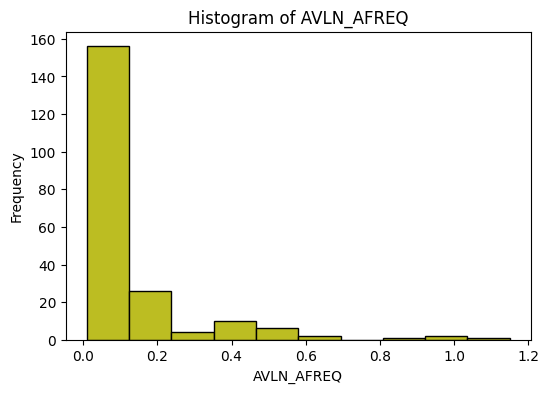

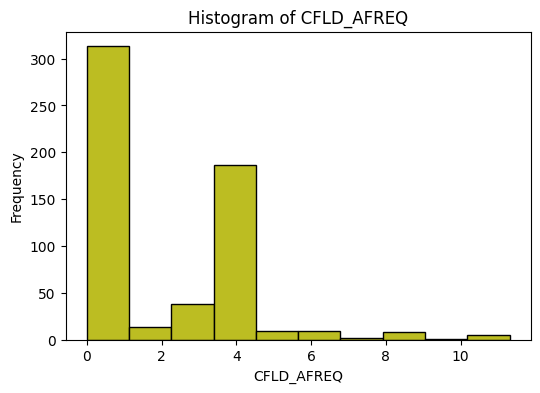

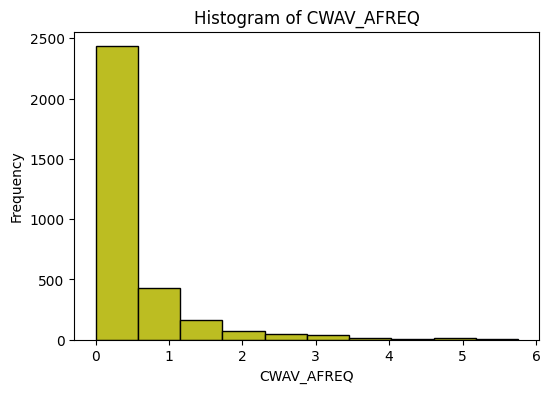

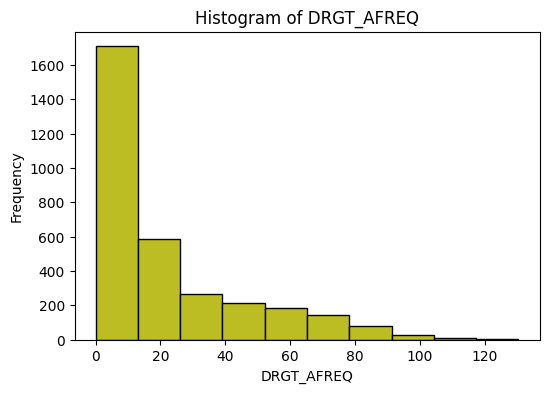

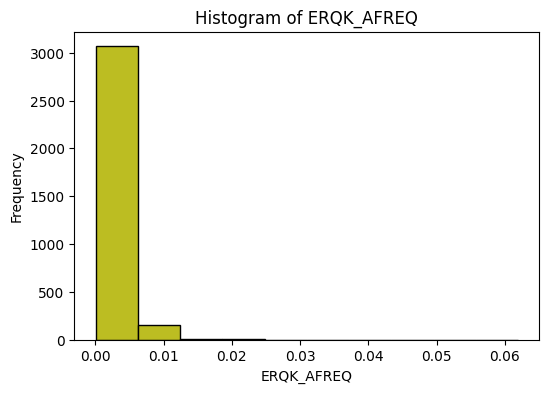

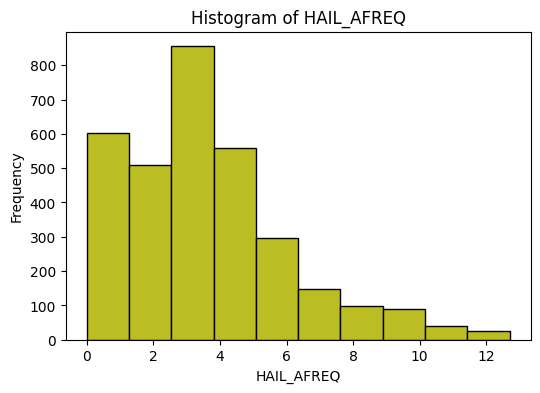

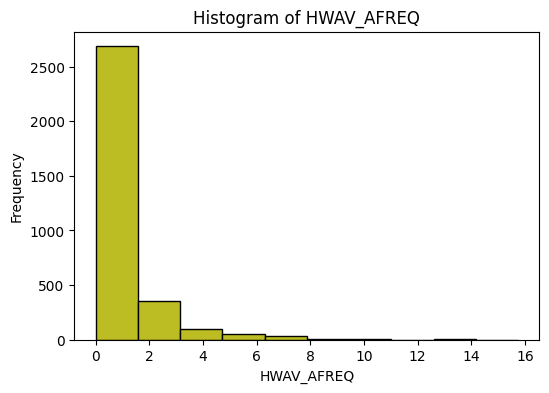

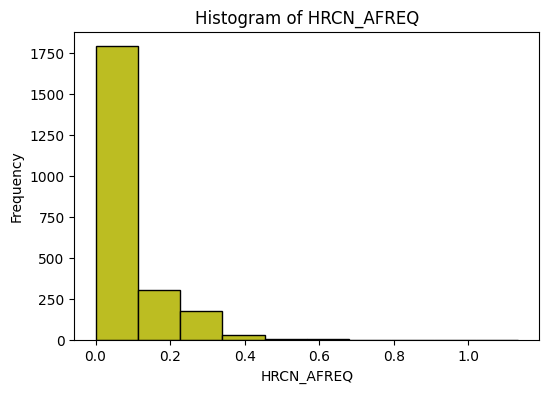

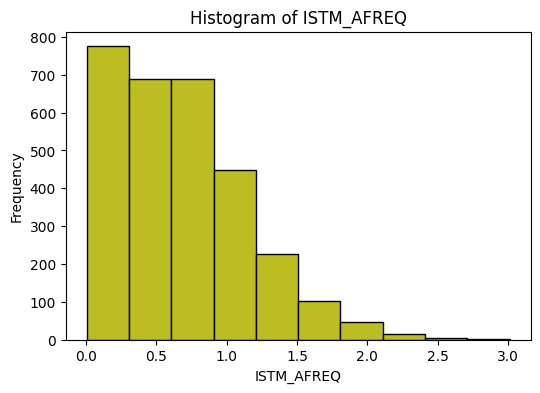

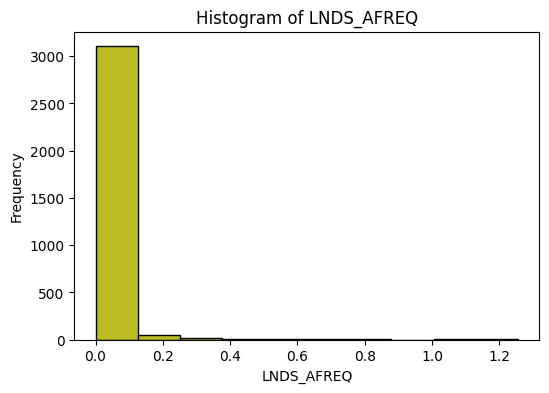

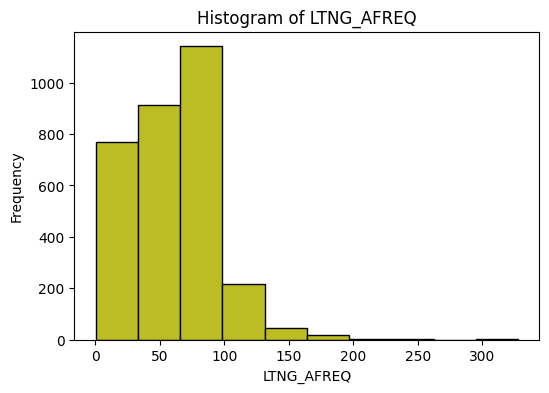

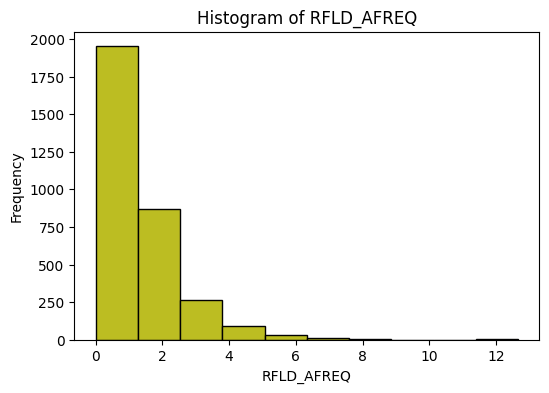

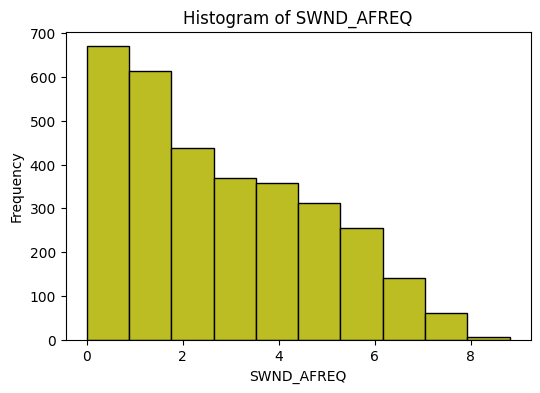

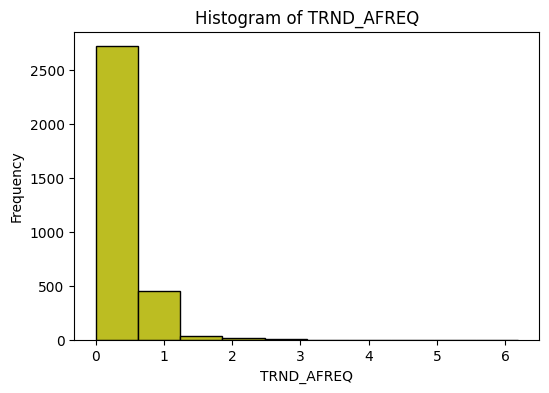

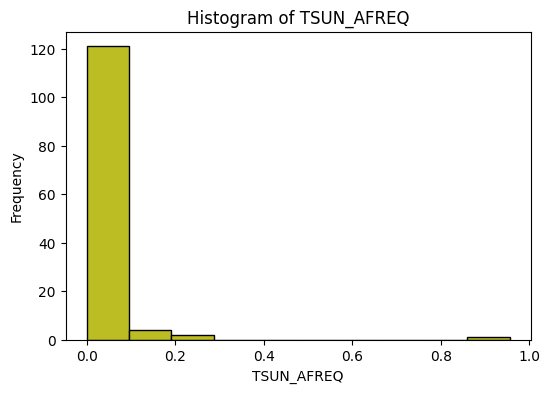

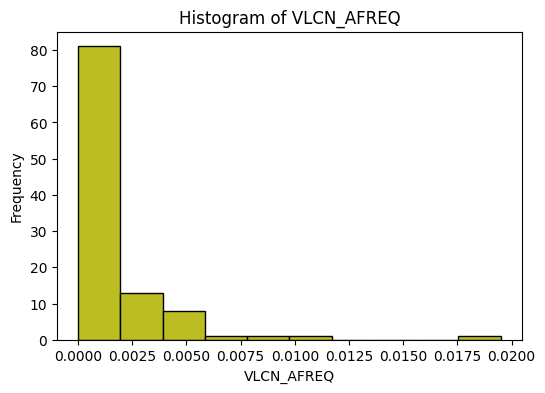

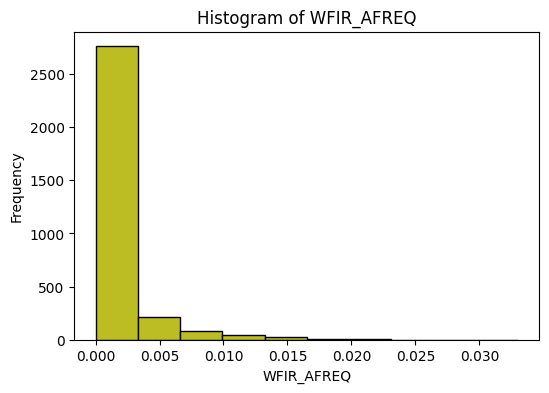

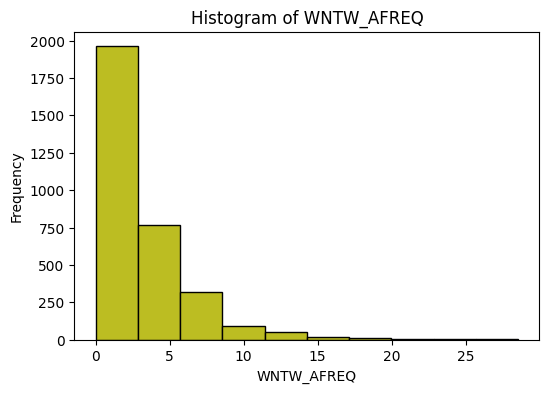

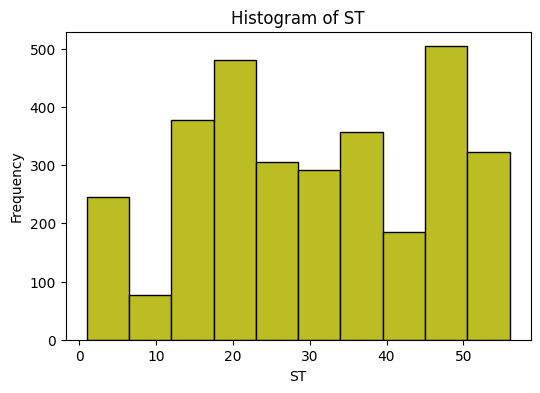

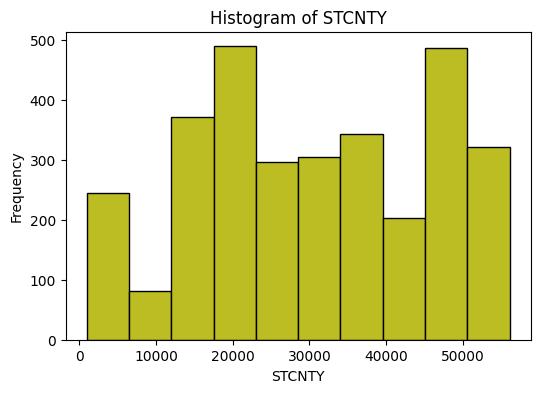

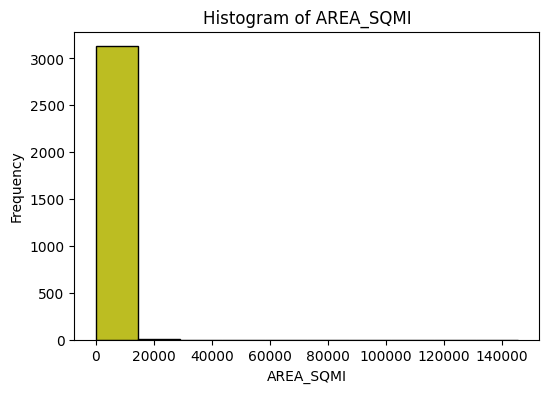

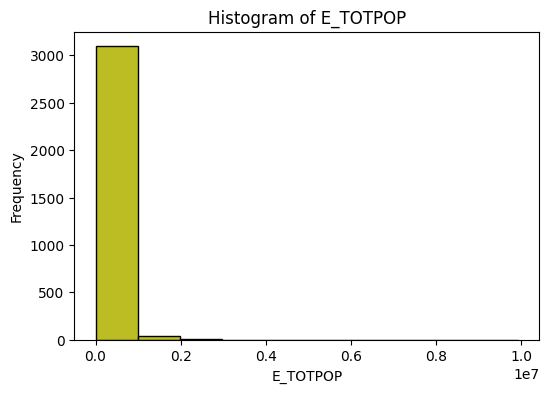

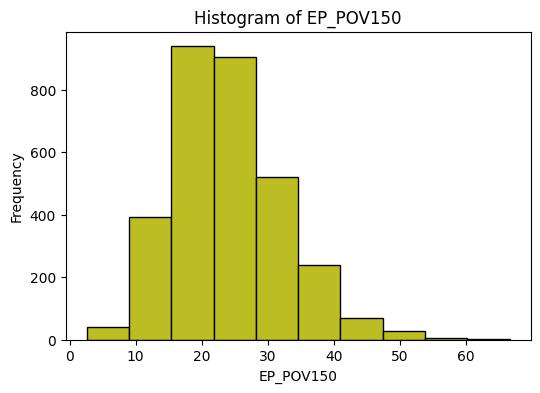

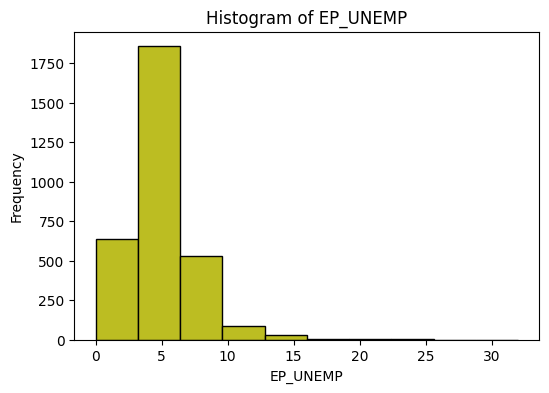

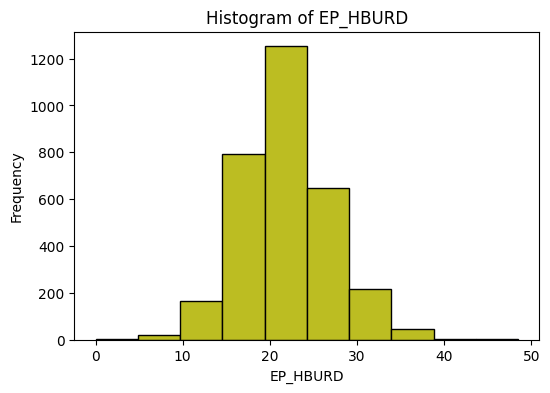

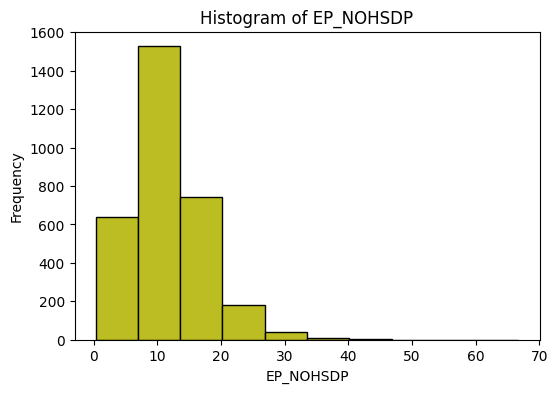

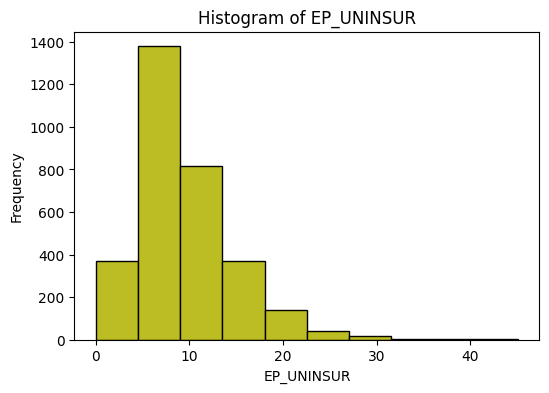

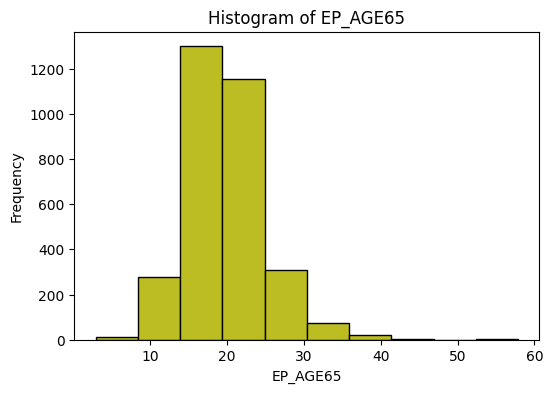

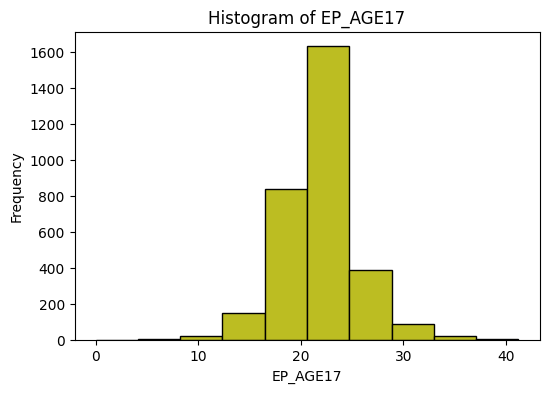

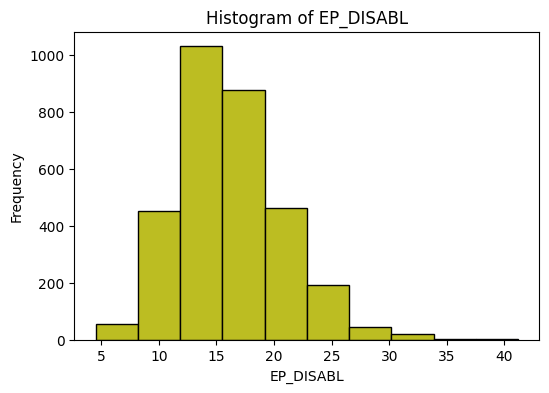

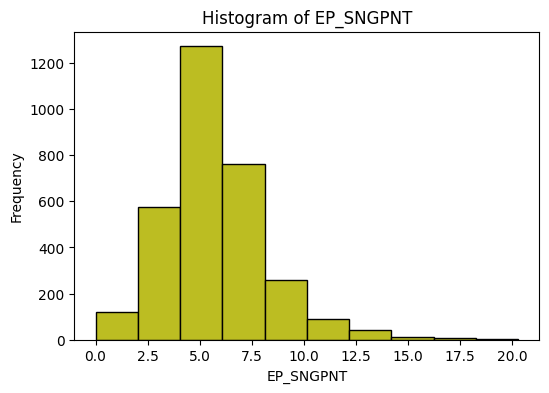

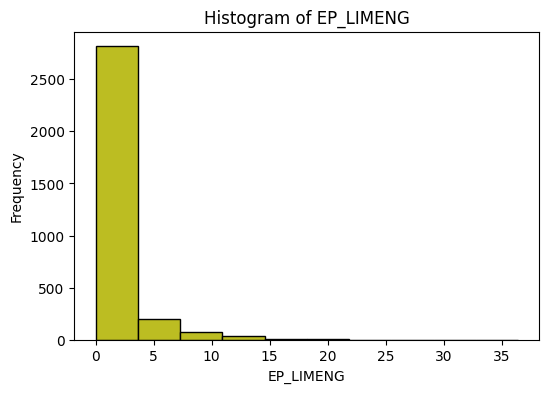

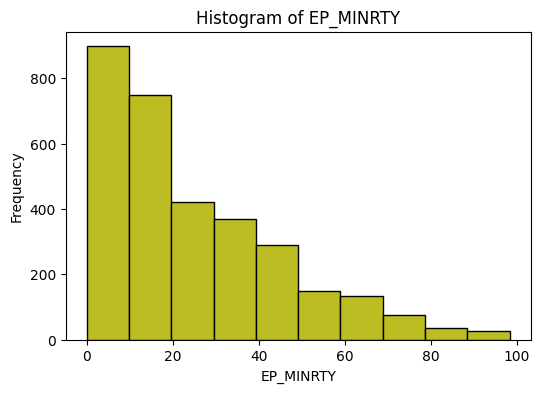

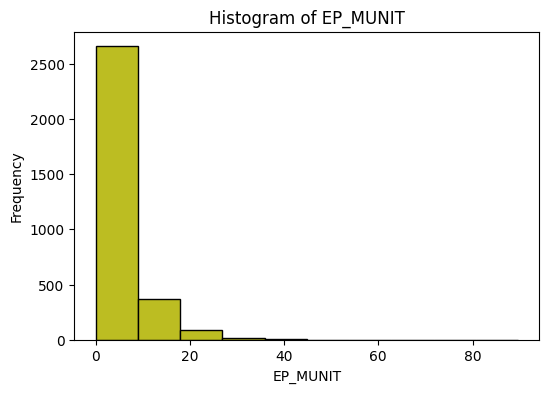

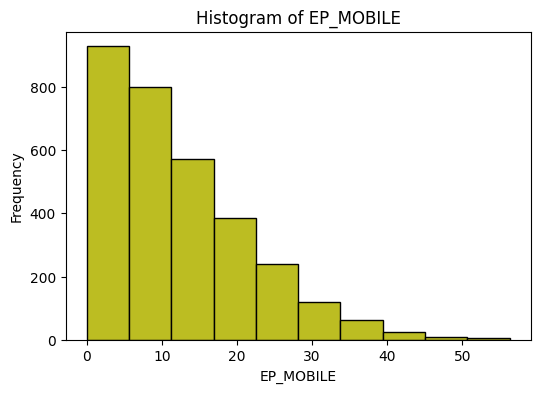

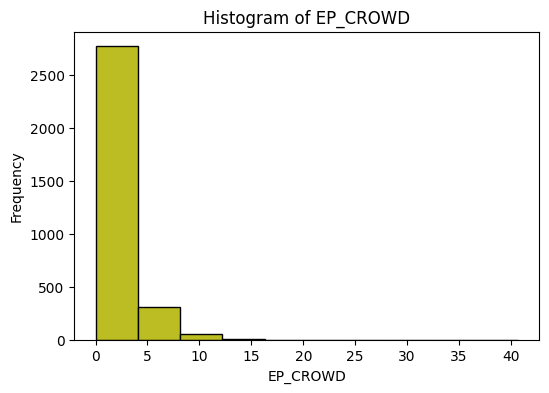

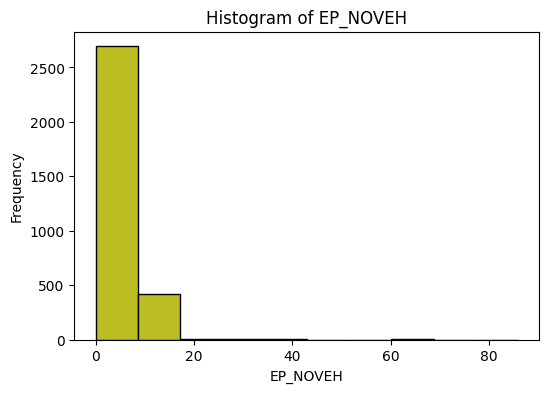

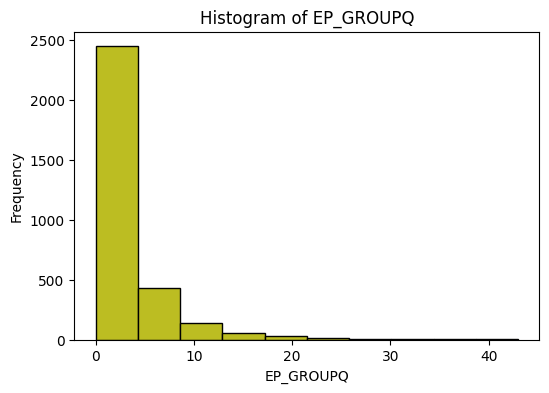

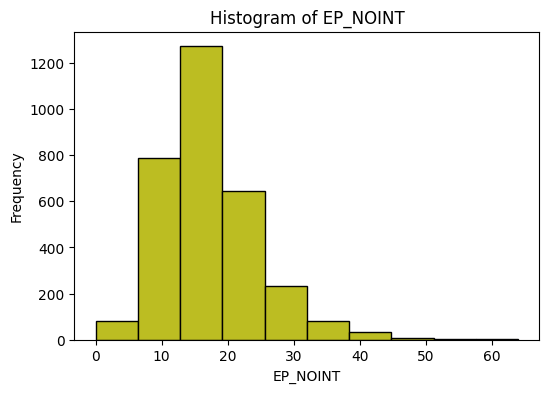

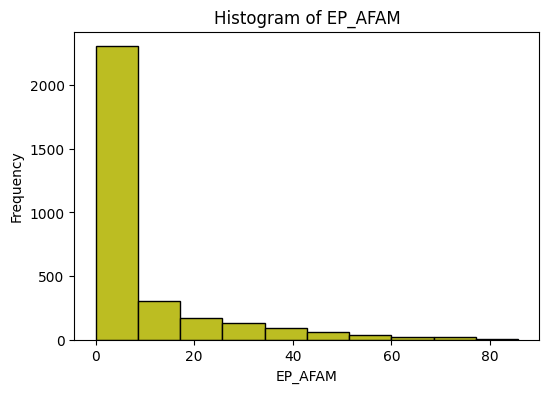

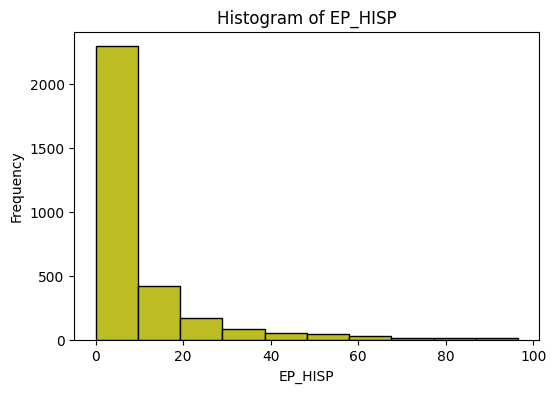

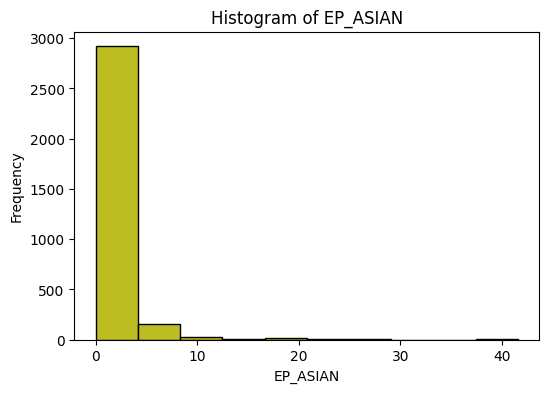

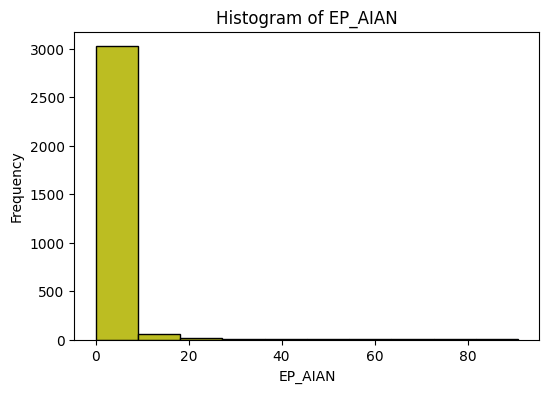

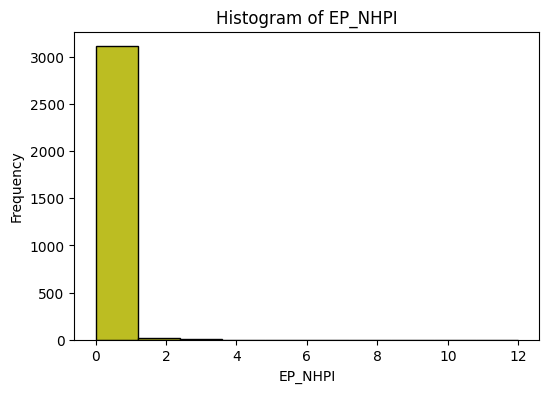

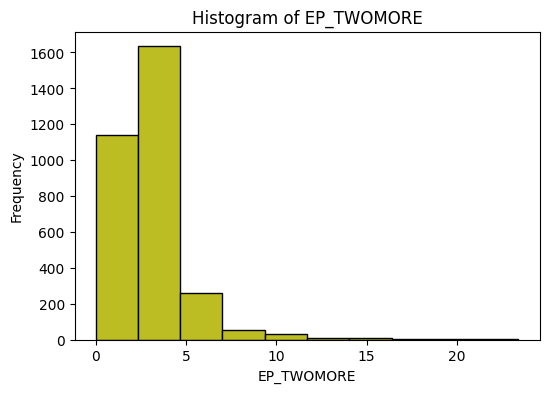

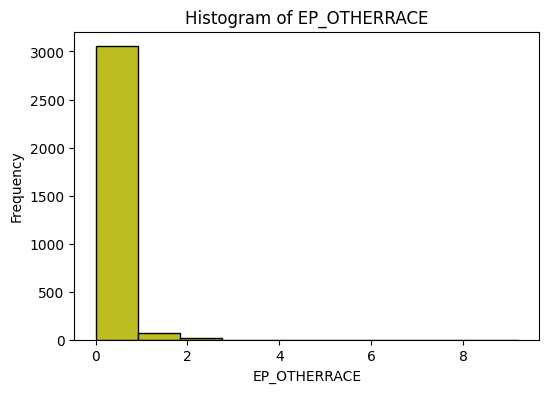

In [16]:
# We can filter the dataset selecting the columns which holds numerical values

merged_dataset_numerical = merged_dataset.select_dtypes(include = ['number'])   
    
print(merged_dataset_numerical)

# We can use Matplotlib to plot the histograms  

import matplotlib.pyplot as plt 

#With a for we can plot one histogram for every numerical variable in the dataframe 

for col in merged_dataset_numerical:
    plt.figure(figsize = (6,4)) 
    plt.hist(merged_dataset_numerical[col], color = 'tab:olive', edgecolor = 'black')   
    plt.title(f'Histogram of {col}') 
    plt.xlabel(col) 
    plt.ylabel('Frequency') 
    plt.show

In [17]:
merged_dataset.to_csv('../data/processed/merged_dataset.csv', index = False)